#GENDER INCOME GAP

*You may know that it is estimated that women earn about 78% of men in the same job position. Can we test that on NYC income data? Can we turn that into a prediction? If you get hired at a certain stipend as a man, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a female job candidate, given what I would offer a man for the same job?)


In [3]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import json
import os
from pandas.tools.plotting import scatter_matrix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#How to import a YouTube video! Cool.
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
#YouTubeVideo("G_ikzQM93W8")

Data obtained from Federica's site: "http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

In [6]:
#split your data by male and female, by loading data in 2 dictionaries
#you could do this with other variables such as race
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that 
#read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

#looking at the data, these will be commented out
#print allmales['all'].head(20)
print allmales['all'].columns

#allfemales['.....
#[...]

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [16]:
#now looking at data for women
allf={}
allf['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allf['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allf['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allf['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allf['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

#looking at the data, these will be commented out
print allf['white'].columns
#allf['all'].describe()


Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10866e450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x108689350>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10af28b50>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cac3f10>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x160592490>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1632429d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x164dea050>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x166fffe90>]], dtype=object)

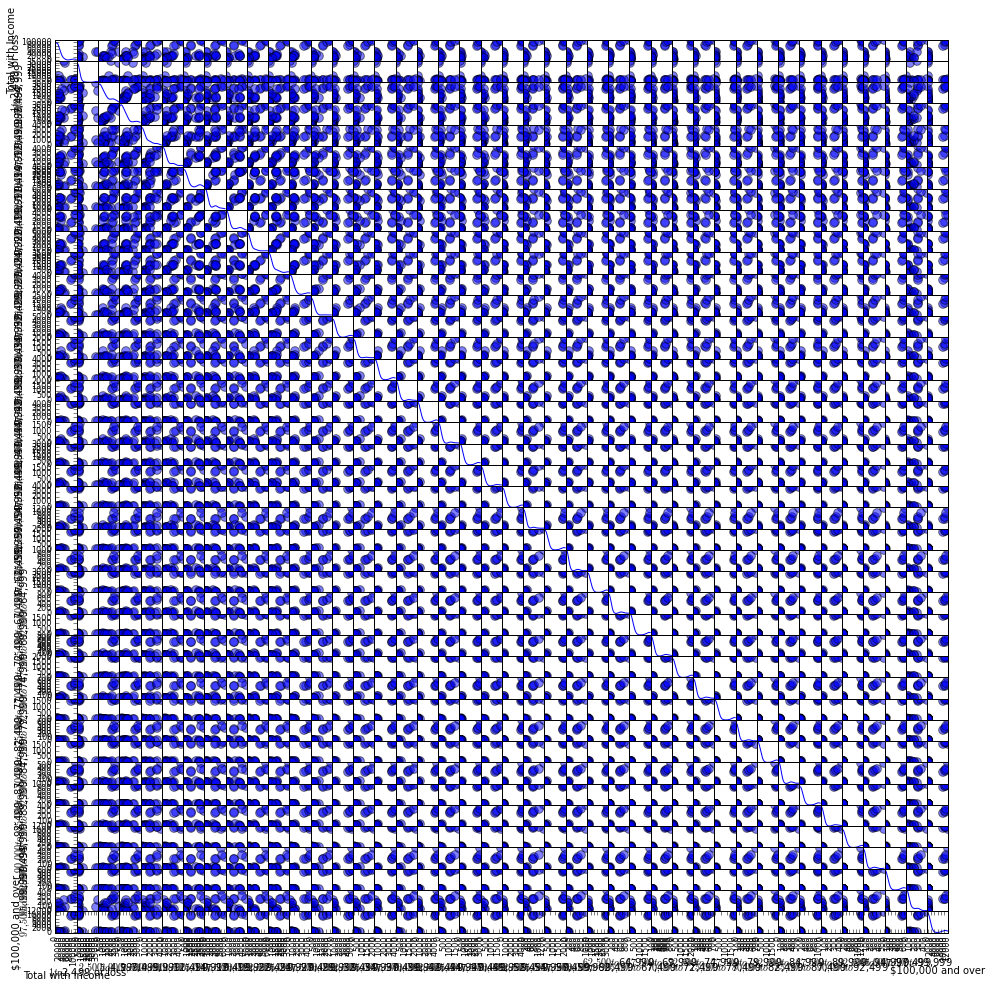

In [7]:
scatter_matrix (allmales['all'], s = 300, figsize = (16, 16), diagonal = 'kde')
#looking at the output of this, I don't quite understand how it is helpful...

In [8]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)


/Users/mariaortiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10835e850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x108537c10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b2f0410>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10da302d0>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x17c45dd10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17ecaa1d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1812e9650>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1841c7890>]], dtype=object)

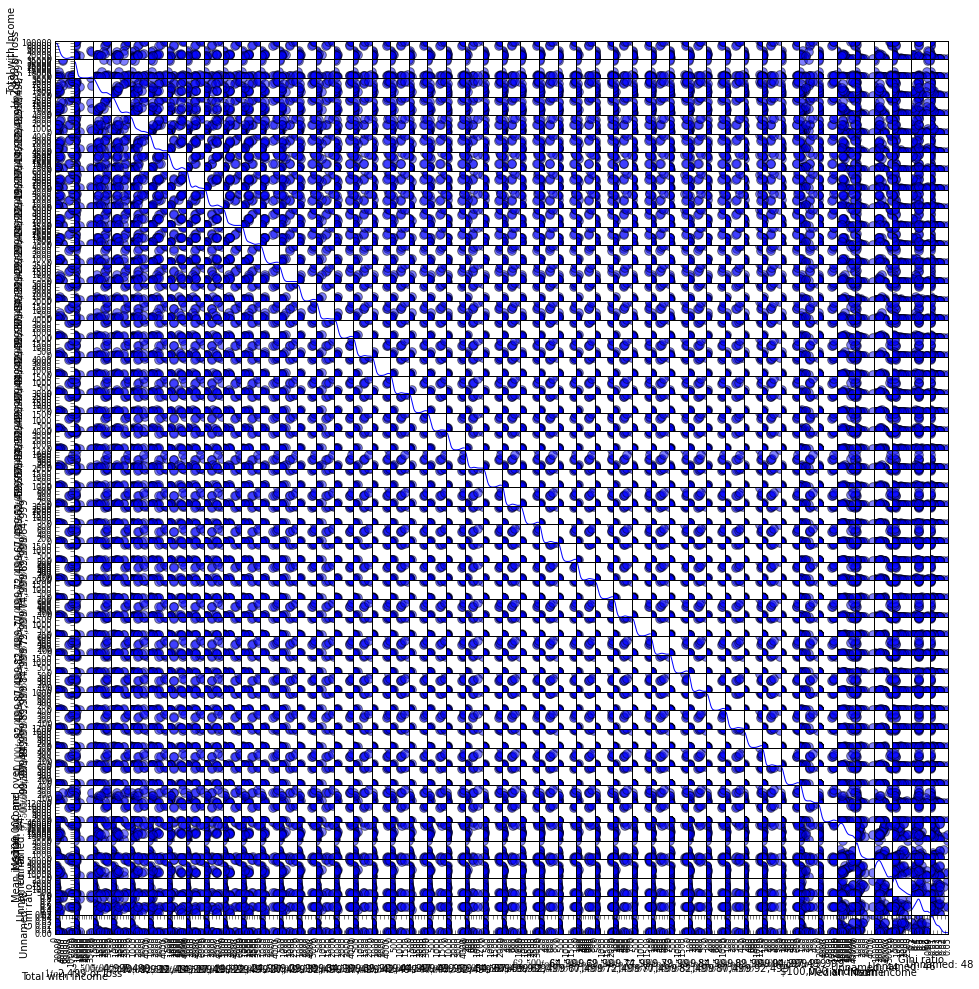

In [10]:
#scattermatrix, see if there are insightfull correlations...
scatter_matrix (allmales['all'], s = 300, figsize = (16, 16), diagonal = 'kde')

In [ ]:
#comment on these correlations


In [9]:
#now doing the same for females
for f in allf:
    nonreal  = allf[f].applymap(np.isreal)
    for w in allf[k].columns :
        if nonreal.sum()[w]>1 and nonreal.sum()[w]<49:
            allf[f][w][~nonreal[w]] = np.float('NaN')
            allf[f][w] = allf[f][w].astype(float)


/Users/mariaortiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


####Make a plot to see how the male and female income relate to each other. Plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)
also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

In [18]:
#plt.scatter...
#fig, axes = plt.subplots(nrows=2, ncols=3)
#allmales['all'].plot(kind='scatter', x='median income', y='allmales.');

#pl.figure(figsize=(10,5))

pl.subplot(3,2,1)
pl.scatter(x=allmales['all'], y=allmales['white'])
pl.title('white')

ValueError: could not convert string to float: The 2014 CPS ASEC included redesigned questions for income and health insurance coverage. All of the approximately 98,000 addresses were eligible to receive the redesigned set of health insurance cove

ValueError: could not convert string to float: The 2014 CPS ASEC included redesigned questions for income and health insurance coverage. All of the approximately 98,000 addresses were eligible to receive the redesigned set of health insurance cove

###Now fit it with a line!

*You can use statsmodels, or scipy, numpy, or create your own residual minimization function. if you want to use numpy (and you do not have to!) you can for example use

pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/
why not challenge yourself (if you want) and create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize
def line ().....

this would be a function that creates a line given parameters, like we did in class
...

return y
def residuals(data, model, error=None):

#you can add errors if you want
you want to return the sum of the residuals (difference b/w data and model **2)
return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!
p0 = [0,1]
result = minimize(residuals, p0, args=(all_males, all_females))
in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [19]:
#fit and plot here
import statsmodels.api as sm


###...It turns out that there is an analytical solution for the OLS regression, which is coded below. (Please try to read the code and understand the formula!)

In [23]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
import scipy.stats
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

NameError: name 'stats' is not defined

###and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

In [ ]:
#plot here


###this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit.
if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative for all forms of income for this analysis.

To unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just what i came up with. If you have something better please share!!) here are a few lines of code that should do the trick. I used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also masked the nan values. I used the numpy ma (masled array) package. Every array is associated by this package to a mask array of Bools [True....False...] of the same size. 

In [25]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allf['all']['Median income'][:].values,allf['white']['Median income'][:].values,allf['black']['Median income'][:].values,allf['hispanic']['Median income'][:].values,allf['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#fit and plot

In [ ]:
#is the line fit similar? can you find any high leverage points?

In [ ]:
#final plot with everything

###Now pick a stipend, maybe your ideal stipend?
and predict what a woman in a position where a man recieves your ideal stipend would make.

Lastly do you have any comments about what these data tell us about race? How you would go about analyzing race differences with these data? (just a few sentences)

####My explanation...

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("dQw4w9WgXcQ")